# 060.SVM (Support Vector Machine)


### data: 성별 소득 data 에 따라 특정 구매자의 구매할지 여부를 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

In [2]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:, [2,3]].values.astype("float32")
y = dataset.iloc[:, 4].values.astype("float32")

In [4]:
# dataset 을 Training 과 Test set 으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
print(X_train.shape)

(320, 2)


### Training set 에 대해 Logistic Regression 을 fitting

- rbf (Radial Basis Function) 사용
$$k(x_1, x_2) = exp(-\gamma||x_1 - x_2||^2)$$

In [6]:
classifier = SVC(kernel='rbf')

classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
y_pred = classifier.predict(X_test)

print(y_pred)
print()
print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1.]

Test set true counts =  22.0
predicted true counts =  24.0
accuracy = 0.95


In [8]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

# making confusion matrix
print("confution matrix\n", confusion_matrix(y_test, y_pred, labels=[1, 0]))
print()
print("f1 score\n", f1_score(y_test, y_pred))
print()
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred, labels=[1, 0])))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred, labels=[1, 0])))

confution matrix
 [[21  1]
 [ 3 55]]

f1 score
 0.9130434782608695

Accuracy: 0.95
Precision: 0.88
Recall: 0.95


## Visualization

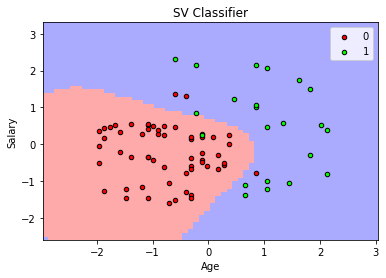

In [9]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1       
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1     

X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

XX = np.column_stack([X1.ravel(), X2.ravel()])

Y = np.array(classifier.predict(XX)).reshape(X1.shape)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])   #rgb(255, 170, 170), rgb(170, 255, 170), rgb(170, 170, 255)
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])    #rgb(255,0,0), rgb(0,255,0), rgb(0,0,255)

plt.pcolormesh(X1, X2, Y, cmap=cmap_light)    # 결정경계 표시

# real data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s=20, color=cmap_bold(0), label=0, edgecolor='k')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s=20, color=cmap_bold(1), label=1, edgecolor='k')

plt.title('SV Classifier')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

# 실습

[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) 를 이용한 종양의 양성, 악성 여부 check  

[cell_samples.csv](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv)

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

In [10]:
cell_df = pd.read_csv("datasets/cell_samples.csv")

In [11]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

### ID column 은 종양의 양성, 악성 판별과 무관한 것이 확실하므로 feature 에서 제외

### BareNuc	역시 numerical data 가 아니므로 dop 

In [12]:
feature_df = cell_df.drop(['ID', 'BareNuc'], axis=1)

In [13]:
feature_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2


### dataframe 을 numpy array 로 변환

## Train/Test dataset 분리

In [ ]:
# your code below